In [28]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
tf.__version__

'2.16.1'

**CARREGAMENTO DAS IMAGENS**

In [29]:
path = "C:\\Users\\caio_\\OneDrive\\Documentos\\Udemy\\IA\\RN\\personagens.zip"
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

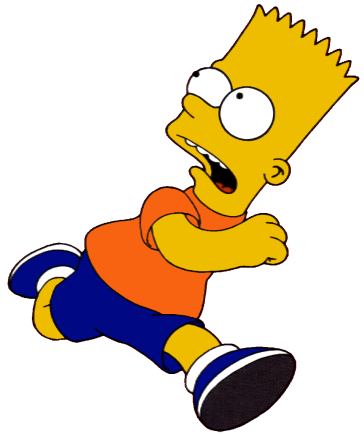

In [30]:
tf.keras.preprocessing.image.load_img(r'C:\\Users\\caio_\\OneDrive\\Documentos\\Udemy\\IA\\RN\\training_set\\bart\\bart100.bmp')

**CONSTRUÇÃO DAS BASES DE TREINAMENTO E TESTE**

In [31]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range = 7,
                                         horizontal_flip= True,
                                         zoom_range=0.2)
base_treinamento = gerador_treinamento.flow_from_directory('./training_set',
                                                           target_size=(64,64),
                                                           batch_size=8,
                                                           class_mode='categorical')

Found 196 images belonging to 2 classes.


In [32]:
base_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
base_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [34]:
gerador_teste = ImageDataGenerator(rescale=1./255)
base_teste = gerador_teste.flow_from_directory('./test_set', #Atualizado: 02/05/2021 - Linha corrigida: gerador_treinamento.flow_from_director --> gerador_teste.flow_from_directory
                                                     target_size = (64, 64),
                                                     batch_size = 8,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 73 images belonging to 2 classes.


In [35]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(32,(3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units=4, activation='relu'))
rede_neural.add(Dense(units=4, activation='relu'))
rede_neural.add(Dense(units=2, activation='softmax'))

c:\Users\caio_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [37]:
rede_neural.fit(base_treinamento, epochs = 100, validation_data=base_teste)

Epoch 1/100


c:\Users\caio_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5017 - loss: 0.7229 - val_accuracy: 0.5753 - val_loss: 0.6775
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6056 - loss: 0.6646 - val_accuracy: 0.5753 - val_loss: 0.6663
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6320 - loss: 0.6524 - val_accuracy: 0.5753 - val_loss: 0.6559
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5891 - loss: 0.6483 - val_accuracy: 0.5753 - val_loss: 0.6424
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6454 - loss: 0.6166 - val_accuracy: 0.6986 - val_loss: 0.5790
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6544 - loss: 0.6008 - val_accuracy: 0.7808 - val_loss: 0.4973
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7355 - loss: 0.5258 - val_accuracy: 0.7808 - val_loss: 0.4525
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8066 - loss: 0.4509 - val_accuracy: 0.8493 - val_

**AVALIAÇÃO REDE NEURAL**

In [38]:
previsoes = rede_neural.predict(base_teste)
previsoes

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[1.0000000e+00, 1.4356605e-09],
       [1.0000000e+00, 2.0287794e-10],
       [9.5754564e-01, 4.2454351e-02],
       [1.0000000e+00, 9.1955230e-13],
       [1.0000000e+00, 1.9170774e-09],
       [1.0000000e+00, 2.9671613e-13],
       [2.8322268e-01, 7.1677727e-01],
       [9.9995458e-01, 4.5459870e-05],
       [9.9996400e-01, 3.5987403e-05],
       [8.7276936e-01, 1.2723064e-01],
       [3.0484365e-03, 9.9695158e-01],
       [3.1008649e-01, 6.8991357e-01],
       [2.2749414e-01, 7.7250588e-01],
       [1.0000000e+00, 2.6202505e-08],
       [9.9998164e-01, 1.8315519e-05],
       [9.9999499e-01, 5.0592312e-06],
       [1.0000000e+00, 4.1622894e-08],
       [1.0000000e+00, 7.6493038e-15],
       [6.2989509e-03, 9.9370110e-01],
       [9.9999738e-01, 2.6700868e-06],
       [9.9997222e-01, 2.7728607e-05],
       [1.0000000e+00, 7.8970318e-14],
       [9.9994957e-01, 5.0397892e-05],
       [1.0000000e+00, 5.7503993e-08],
       [9.9999988e-01, 6.4886088e-08],
       [9.9999487e-01, 5.

In [39]:
import numpy as np
previsoes2 = np.argmax(previsoes, axis = 1)
previsoes2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes2, base_teste.classes)

0.9178082191780822

<Axes: >

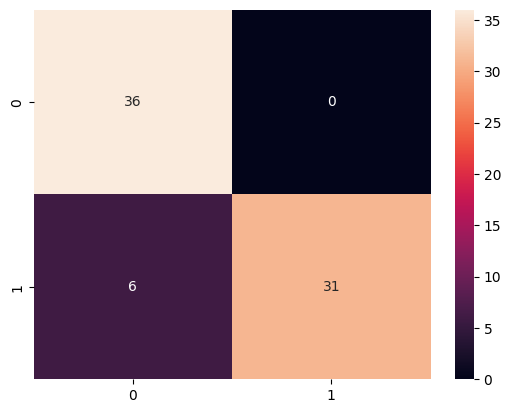

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(previsoes2, base_teste.classes)
sns.heatmap(cm, annot= True)